In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt,font_manager as fm
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
from numpy import arange
from numpy.linalg import norm

C:\Users\bapib\AppData\Local\Temp/ipykernel_15988/1909060657.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Lorentz Attractor:  three-dimensional set of nonlinear deterministic solutions of the Lorenz system; Motion may be chaotic, non-periodic or periodic 

Solve:

$\dfrac{dx}{dt}=\sigma(y-x)$

$\dfrac{dy}{dt}=x(\rho-z)-y$

$\dfrac{dz}{dt}=xy-\beta z$



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [13]:

def dx(t, x, y, z, sigma):
    return sigma*(y-x)

def dy(t, x, y, z, rho):
    return x*(rho-z)-y

def dz(t, x, y, z, beta):
    return x*y-beta*z

h=0.01
t=40

rho = 28.0       # alpha in ppt
sigma = 10.0
beta = 8.0 / 3.0

t0,x0,y0,z0=0, 0, 1, 5

t_arr=[]
x_arr=[]
y_arr=[]
z_arr=[]

while(t0<=t):
    if(t0>1):
        t_arr.append(t0)
        x_arr.append(x0)
        y_arr.append(y0)
        z_arr.append(z0)

    k1=h*dx(t0,x0,y0,z0,sigma);
    m1=h*dy(t0,x0,y0,z0,rho);
    n1=h*dz(t0,x0,y0,z0,beta);
    k2=h*dx(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,z0+n1/2.0,sigma);
    m2=h*dy(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,z0+n1/2.0,rho);
    n2=h*dz(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,z0+n1/2.0,beta);
    k3=h*dx(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,z0+n2/2.0,sigma);
    m3=h*dy(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,z0+n2/2.0,rho);
    n3=h*dz(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,z0+n2/2.0,beta);
    k4=h*dx(t0+x0,x0+k3,y0+m3,z0+n3,sigma);
    m4=h*dy(t0+x0,x0+k3,y0+m3,z0+n3,rho);
    n4=h*dz(t0+x0,x0+k3,y0+m3,z0+n3,beta);

    x=x0+1/6.0*(k1+2*k2+2*k3+k4);   
    y=y0+1/6.0*(m1+2*m2+2*m3+m4);
    z=z0+1/6.0*(n1+2*n2+2*n3+n4);

    x0=x;
    y0=y;
    z0=z;
    t0=t0+h;


C:\Users\bapib\AppData\Local\Temp/ipykernel_15988/2093653038.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


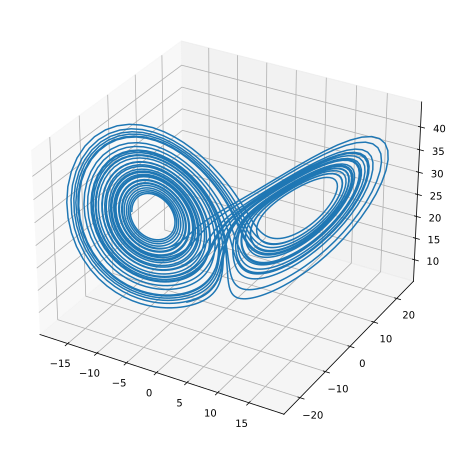

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection="3d")
ax.plot(x_arr,y_arr,z_arr)
plt.draw()
plt.show()

In the absence of exact knowledge of the initial conditions we cannot predict future. Solutions are highly sensitive to initial conditions. This effect is heavily studied in dynamics of fluids, weather conditions analysis. In dynamical system attractor (generally- strange attractors) is a set of states towards which system tend to evolve for wide range of starting pcondtions. Two pillars, A and B- particles gets attracted towards these pillars starting from any point. The trajectories are very senstive to initial conditions. Hence changing the initial values, trajectories may change drastically (video). Two points initially near may evolve arbitrarily far apart at later times. Firstlt particle seems to move in random direction, once it reach attractor trajectories diverge. Each particle following its own path (set by initial conditions) without crossing/intersecting. Motion is never repeated- chaos.

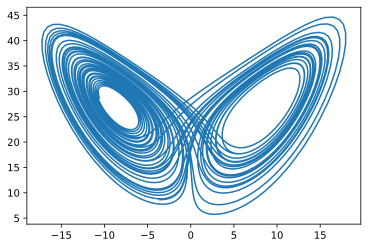

In [15]:
plt.plot(x_arr,z_arr)

# Chaotic Logistic map and bifurcation

$x_{n+1}=\alpha x_n(1-x_n)$

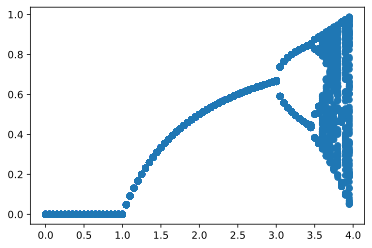

In [17]:
def xn1(alpha, xn):
    return alpha*xn*(1-xn)

x=0.001
stability=[]
rate=[]
for alpha in np.arange(0,4,0.05):
    i=1   
    x1=xn1(alpha,x)       
    while(i<=10100):
        if(i>=10000):
            stability.append(xn1(alpha,x1))
            rate.append(alpha)
                                      
        x1=xn1(alpha,x1)
        i=i+1
fig=plt.figure(figsize=(6,4))
plt.plot(rate,stability,"o")

In dynamical system, bifrucation diagrams shows values visited asymptotically. Vertical axis shows set of values of logistic function visited from all initial conditions converging to equlibrium. This is very important to study chaotic behvaiour of various real systems. For example: population of flies. Bifrucation occurs after value around 3, 3.45, 3.54, 3.564, 3.569 and so on. Chaos and randomness after that, which is also used to produce random numbers. Knowing initial values precisely, we can get to future values, which is used to fix seed for which reason we call is generation of pseudo random number. 